<a href="https://colab.research.google.com/github/NarayaniSuresh/ADVANCEDDL/blob/main/e0321036_Dropout_CA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/50
594/594 - 61s - loss: 1.6235 - accuracy: 0.4066 - val_loss: 1.3860 - val_accuracy: 0.5197 - 61s/epoch - 102ms/step
Epoch 2/50
594/594 - 49s - loss: 1.3202 - accuracy: 0.5301 - val_loss: 1.1903 - val_accuracy: 0.5895 - 49s/epoch - 83ms/step
Epoch 3/50
594/594 - 50s - loss: 1.2019 - accuracy: 0.5749 - val_loss: 1.1157 - val_accuracy: 0.6097 - 50s/epoch - 84ms/step
Epoch 4/50
594/594 - 49s - loss: 1.1200 - accuracy: 0.6047 - val_loss: 1.0585 - val_accuracy: 0.6252 - 49s/epoch - 83ms/step
Epoch 5/50
594/594 - 48s - loss: 1.0673 - accuracy: 0.6238 - val_loss: 1.0402 - val_accuracy: 0.6428 - 48s/epoch - 82ms/step
Epoch 6/50
594/594 - 50s - loss: 1.0320 - accuracy: 0.6352 - val_loss: 0.9611 - val_accuracy: 0.6662 - 50s/epoch - 83ms/step
Epoch 7/50
594/594 - 47s - loss: 0.9897 - accuracy: 0.6514 - val_loss: 0.9308 - val_accuracy: 0.6815 - 47s/epoch - 79ms/step
Epoch 8/50
594/594 - 48s - loss: 0.9629 - accuracy: 0.660

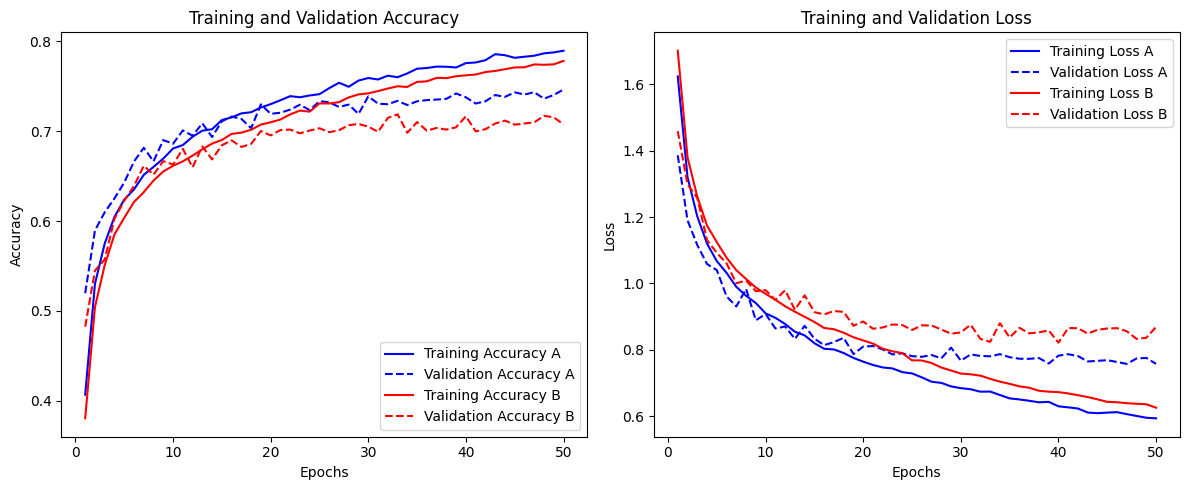

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Split training data into training and validation sets
x_val, y_val = x_train[-12000:], y_train[-12000:]
x_train, y_train = x_train[:-12000], y_train[:-12000]

# Define the function to create the model
def create_model(dropout1, dropout2):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Dropout(dropout1),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(dropout2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Configuration A: First layer dropout = 0.2, Second layer dropout = 0.5
model_a = create_model(0.2, 0.5)
history_a = model_a.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val), verbose=2)

# Configuration B: First layer dropout = 0.5, Second layer dropout = 0.2
model_b = create_model(0.5, 0.2)
history_b = model_b.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val), verbose=2)

# Evaluate models on the test set
test_loss_a, test_acc_a = model_a.evaluate(x_test, y_test, verbose=2)
test_loss_b, test_acc_b = model_b.evaluate(x_test, y_test, verbose=2)

# Print test accuracies
print(f'Configuration A - Test Accuracy: {test_acc_a:.4f}')
print(f'Configuration B - Test Accuracy: {test_acc_b:.4f}')

# Plot the training and validation accuracy and loss
def plot_history(history_a, history_b):
    epochs = range(1, 51)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_a.history['accuracy'], 'b-', label='Training Accuracy A')
    plt.plot(epochs, history_a.history['val_accuracy'], 'b--', label='Validation Accuracy A')
    plt.plot(epochs, history_b.history['accuracy'], 'r-', label='Training Accuracy B')
    plt.plot(epochs, history_b.history['val_accuracy'], 'r--', label='Validation Accuracy B')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_a.history['loss'], 'b-', label='Training Loss A')
    plt.plot(epochs, history_a.history['val_loss'], 'b--', label='Validation Loss A')
    plt.plot(epochs, history_b.history['loss'], 'r-', label='Training Loss B')
    plt.plot(epochs, history_b.history['val_loss'], 'r--', label='Validation Loss B')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_a, history_b)